In [1]:
import os
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import csv


# Summary of all PHUs

In [2]:
Data = np.zeros([34,365])
PHU_path = './../PHU_data'
files = os.listdir(PHU_path)

for ii in range(0,34):
  if ii < 9:
    target_name_part = "0"+str(ii+1)+"-"
  else:
    target_name_part = str(ii+1)+"-"
  for file in files:
      if target_name_part in file:
          target_file = file
          break
  else:
      raise FileNotFoundError(f"Could not find any file containing '{target_name_part}'.")

  filepath = os.path.join(PHU_path,target_file)
  Data[ii,:] = np.genfromtxt(filepath, delimiter=',')

population_by_phu = np.genfromtxt(f'{PHU_path}/population_by_phu.csv', delimiter=',')


In [3]:
import csv
phus = []
csv_file_path = f'{PHU_path}/phu_list.csv'

with open(csv_file_path, mode='r') as file:
    csv_reader = csv.reader(file)
    next(csv_reader)
    # Iterate through the rows and append the first column to the list
    for row in csv_reader:
        if row:  # Ensure the row is not empty
            phus.append(row[0])

print(phus)

['Algoma', 'Brant', 'Chatham-Kent', 'DurhamRegional', 'EasternOntario', 'GreyBruce', 'Haldimand-Norfolk', 'Haliburton', 'HaltonRegional', 'Hamilton', 'Hastings and PrinceEdward Counties', 'HuronPerth', 'Kingston', 'Lambton', 'Leeds', 'Middlesex-London', 'NiagaraRegionalArea', 'NorthBayParrySound', 'Northwestern', 'Ottawa', 'Oxford Elgin St.Thomas', 'Peel Regional', 'Peterborough County-City', 'Porcupine', 'Renfrew County and District', 'Simcoe Muskoka District', 'Sudbury and District', 'ThunderBay District', 'Timiskaming', 'City of Toronto', 'Waterloo', 'Wellington-Dufferin-Guelph', 'Windsor-EssexCounty', 'York Regional']


/var/folders/lr/4h04vl_92s3d0hrwg37l8g740000gn/T/ipykernel_87421/204069136.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  f, ax = plt.subplots(1, figsize=(5,3))


<Figure size 640x480 with 0 Axes>

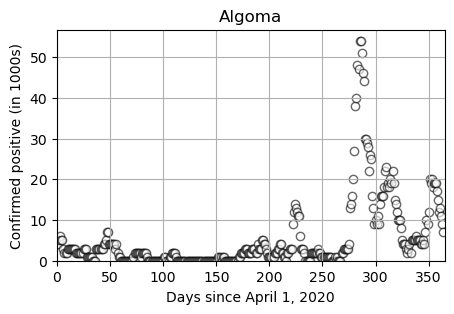

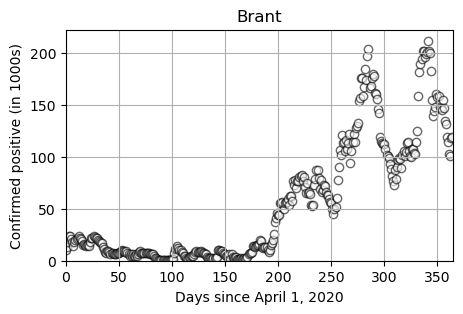

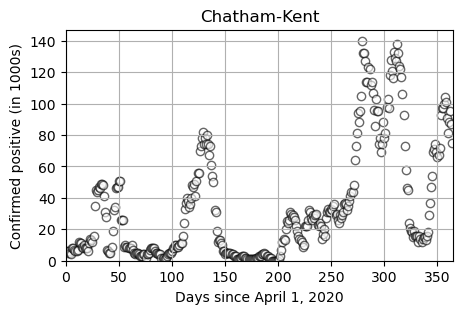

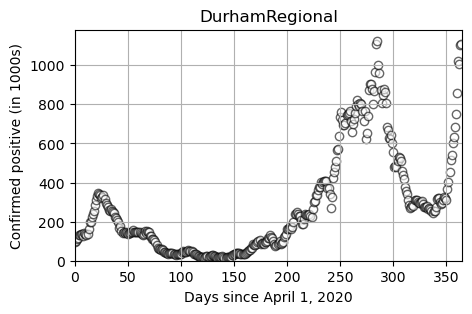

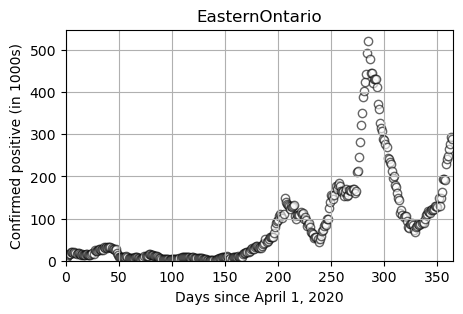

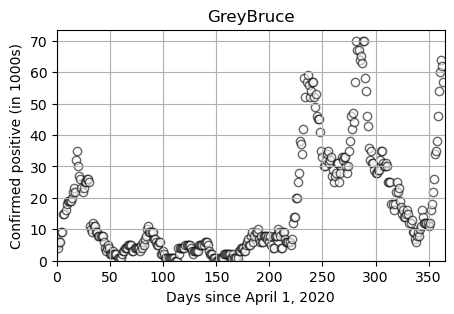

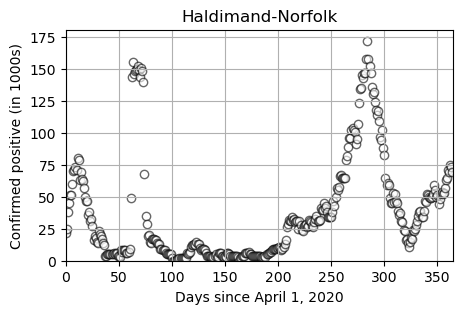

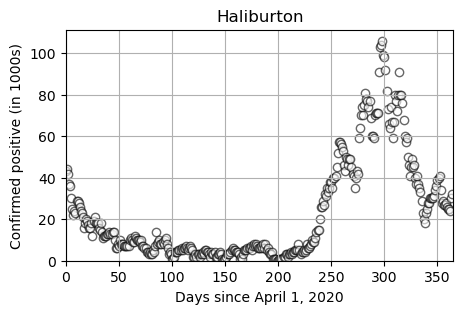

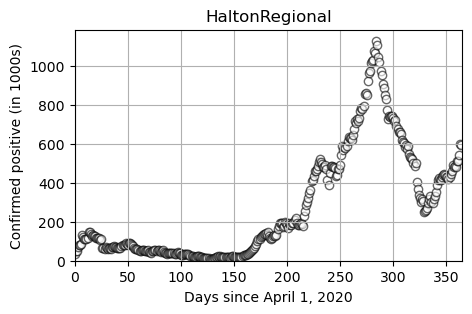

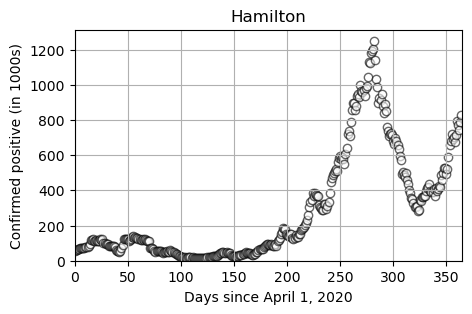

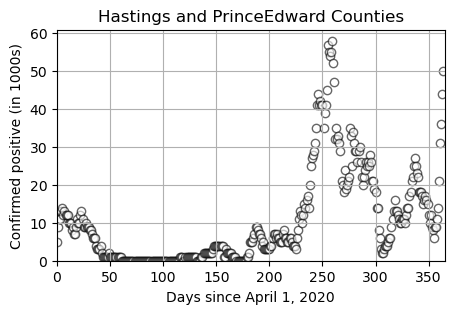

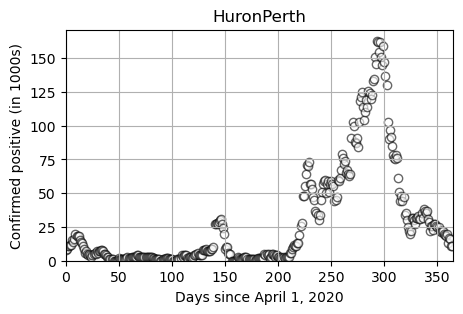

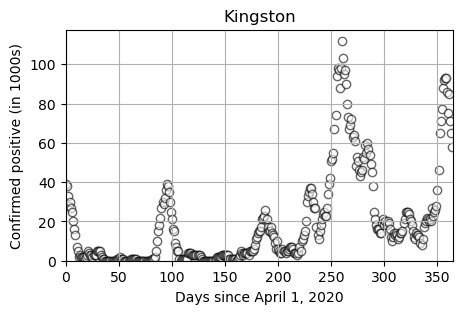

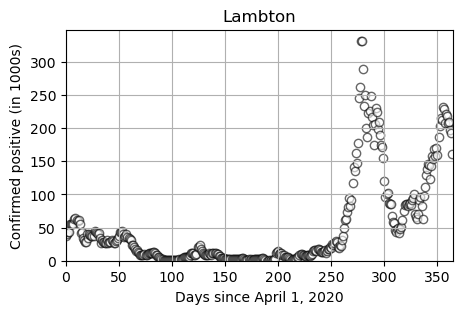

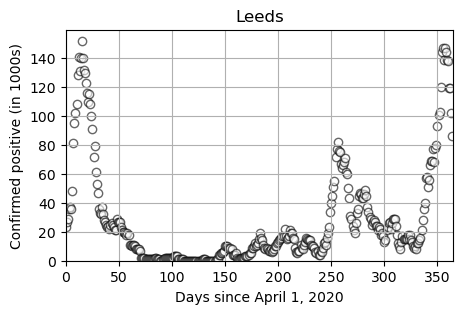

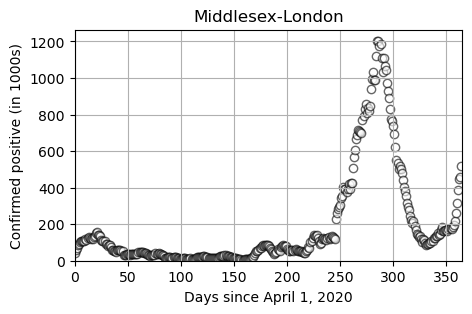

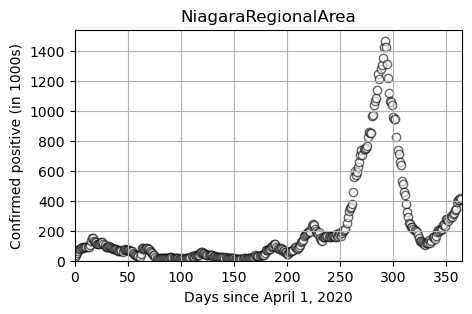

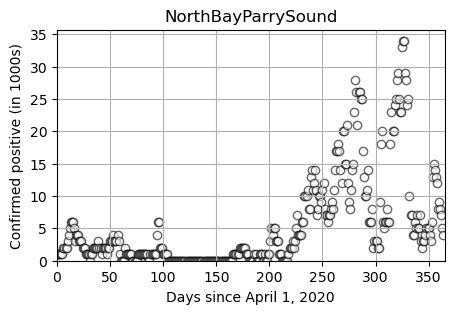

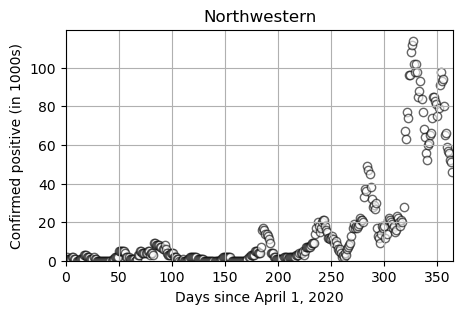

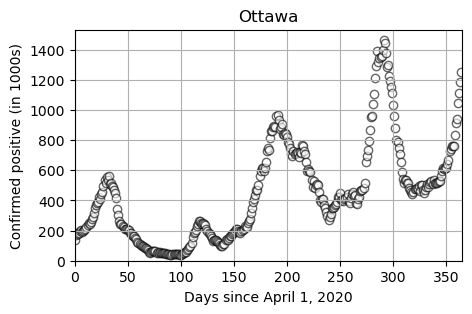

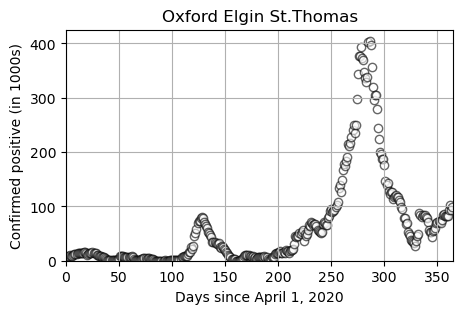

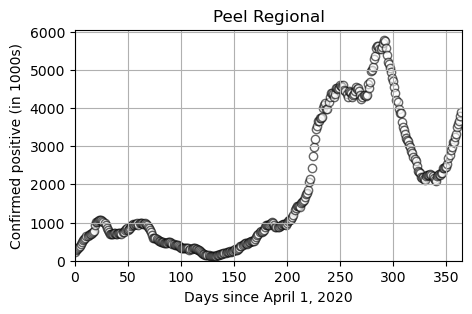

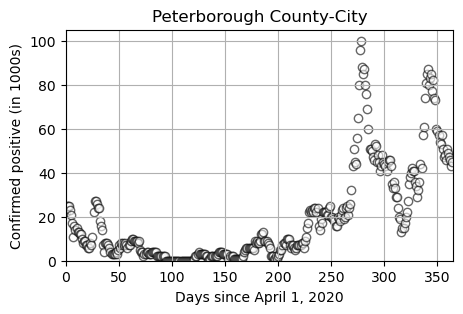

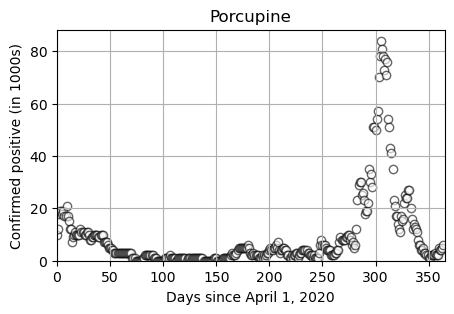

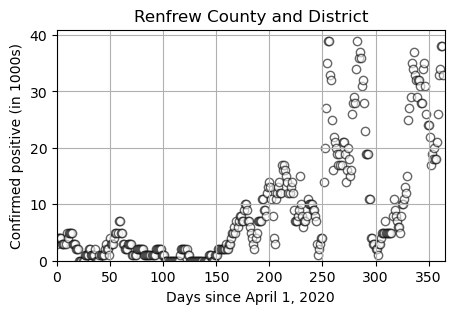

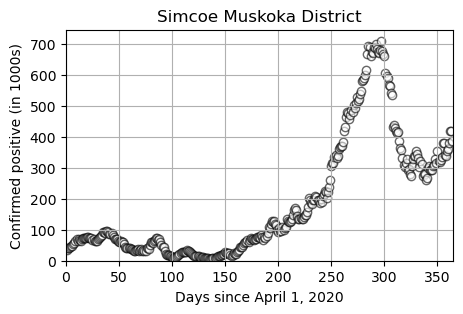

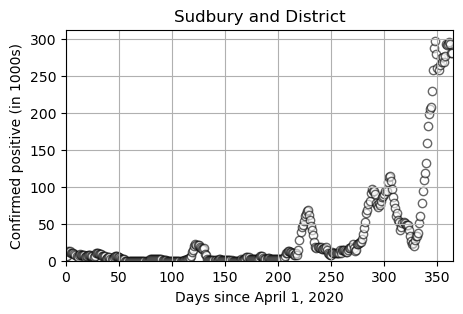

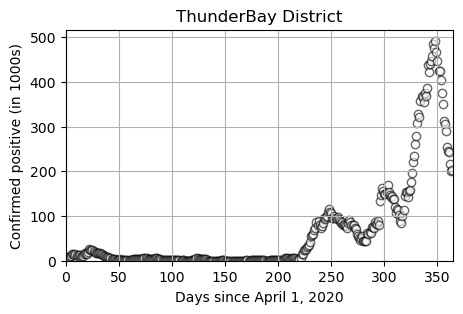

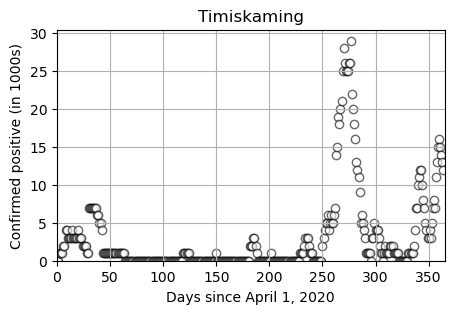

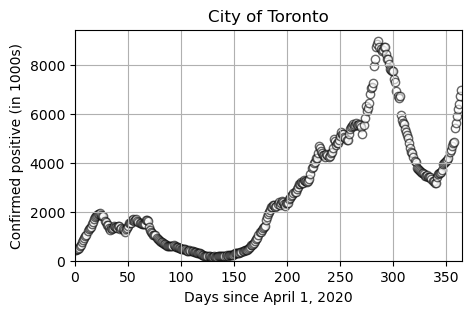

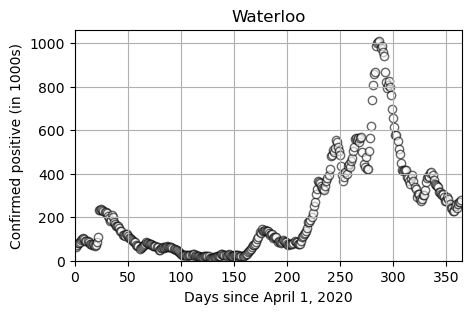

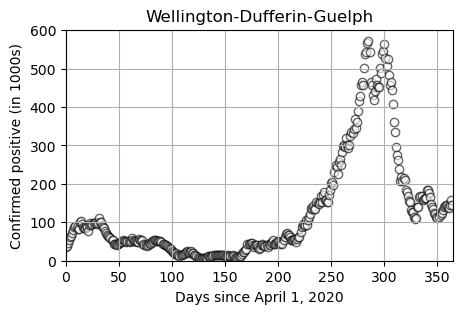

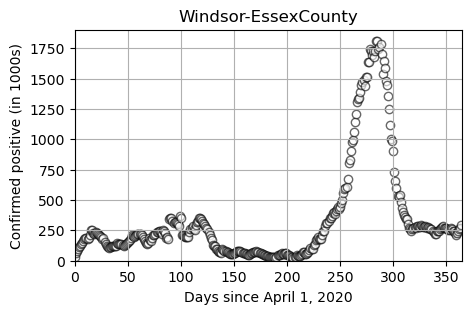

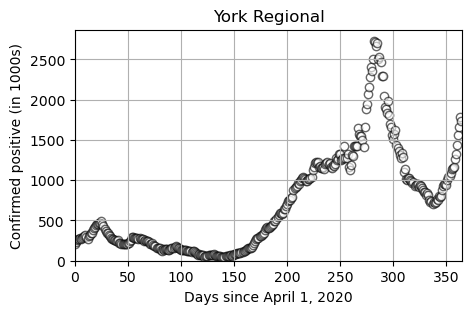

In [4]:
Ndays = 365
tdata = np.arange(0,Ndays)

for ii in range(34):
  yobs = Data[ii,:]
#   np.savetxt('dat/data'+str(ii+1)+'.dat',yobs/population_by_phu[ii,1])

  # Population of Ontario 2020 14,726,000
  plt.figure(ii)
  f, ax = plt.subplots(1, figsize=(5,3))
  plt.scatter(tdata,yobs,color='w',edgecolors='k',zorder=1,alpha=0.6,label='Data')
  plt.grid(True)
  plt.xlim([0,Ndays])
  plt.ylim(bottom=0)
  plt.title(phus[ii])
  plt.xlabel('Days since April 1, 2020', fontsize=10)
  plt.ylabel(r'Confirmed positive (in 1000s)', fontsize=10)
  # plt.savefig('Case3_data.pdf',bbox_inches='tight')



